Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

## Attribute Information:

### Matrix column entries (attributes):

#### name - ASCII subject name and recording number
#### MDVP:Fo(Hz) - Average vocal fundamental frequency
#### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#### MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#### measures of variation in fundamental frequency
#### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#### NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#### status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#### RPDE,D2 - Two nonlinear dynamical complexity measures
#### DFA - Signal fractal scaling exponent
#### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

### Q1. Load the dataset 

In [2]:
df = pd.read_csv('parkinsons.csv')

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [4]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

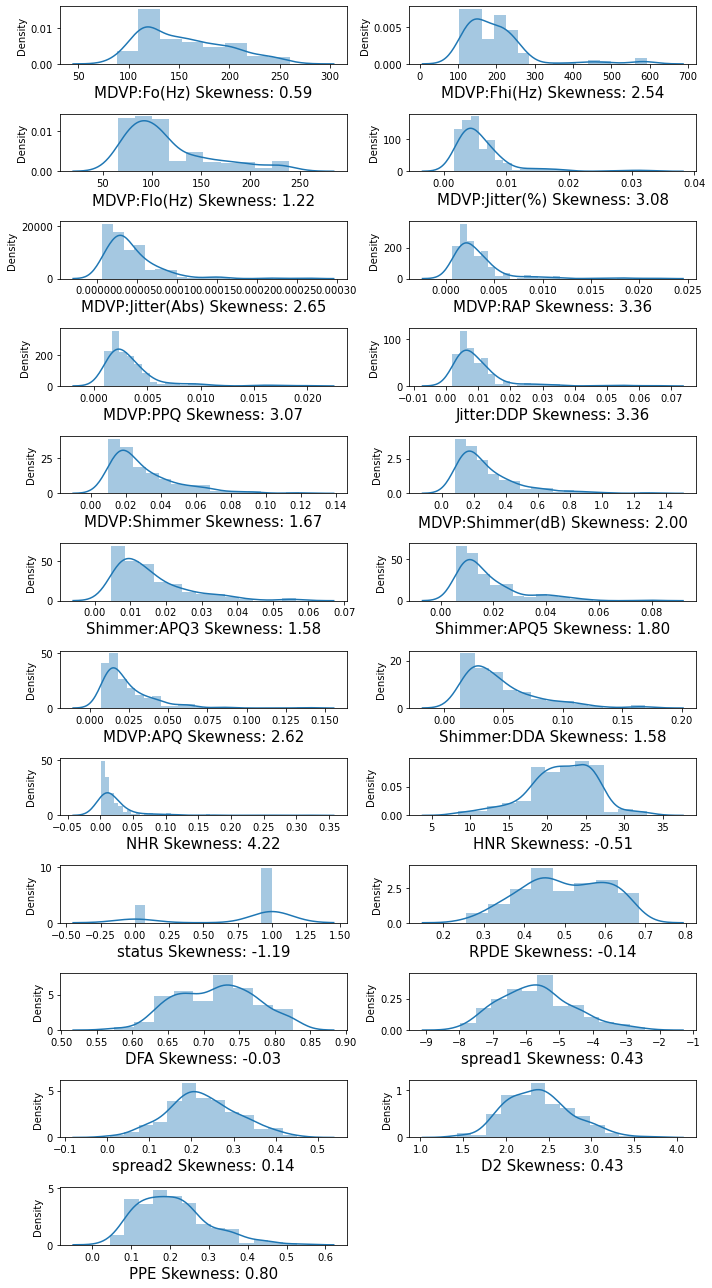

In [17]:
plt.figure(figsize=(10,18))
cols = df.select_dtypes(include=np.number).columns
t=1
for i in cols:
    plt.subplot(12,2,t)
    sns.distplot(df[i])
    plt.xlabel('%s Skewness: %.2f'%(i,df[i].skew()),fontsize=15)
    t+=1
plt.tight_layout()
plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

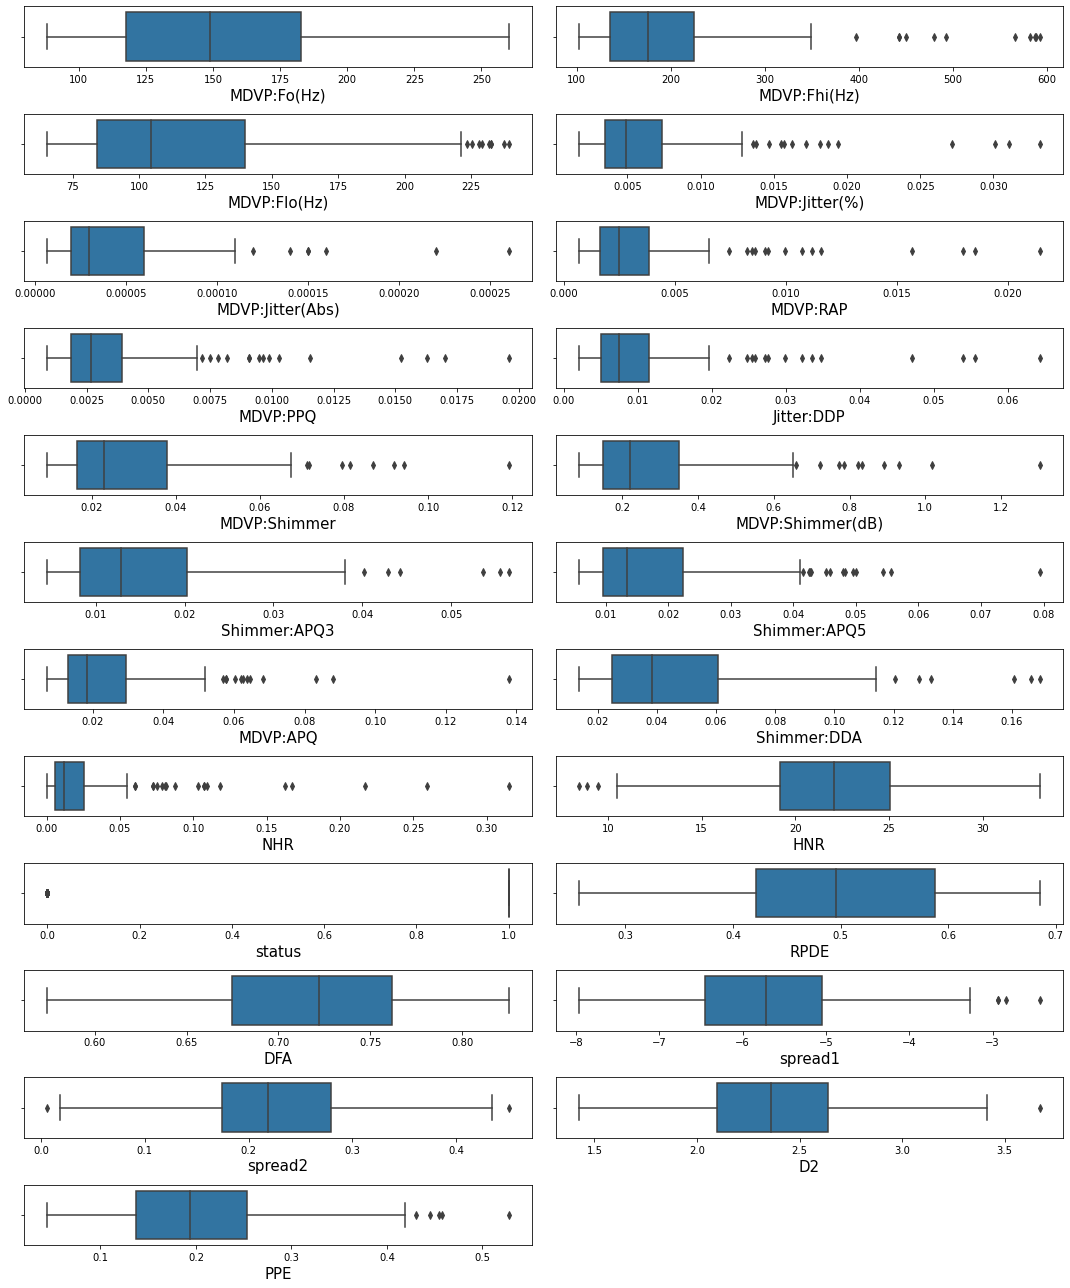

In [72]:
plt.figure(figsize=(15,18))
cols = df.select_dtypes(include=np.number).columns
t=1
for i in cols:
    plt.subplot(12,2,t)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=15)
    t+=1
plt.tight_layout()
plt.show()

### Q7. Are there any strong correlations among the independent features?

In [73]:
df.corr()>0.5

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Fhi(Hz),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Flo(Hz),True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Jitter(%),False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
MDVP:Jitter(Abs),False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
MDVP:RAP,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
MDVP:PPQ,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
Jitter:DDP,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
MDVP:Shimmer,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,True,True
MDVP:Shimmer(dB),False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,True,True


### Q8. Split dataset into training & test dataset  

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['status','name'])
y = df.status

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10,test_size=0.2)

In [48]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((156, 22), (39, 22), (156,), (39,))

### Q9. Create a default decision tree model using criterion = Entropy 

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=10)

dtmodel = dt.fit(xtrain,ytrain)


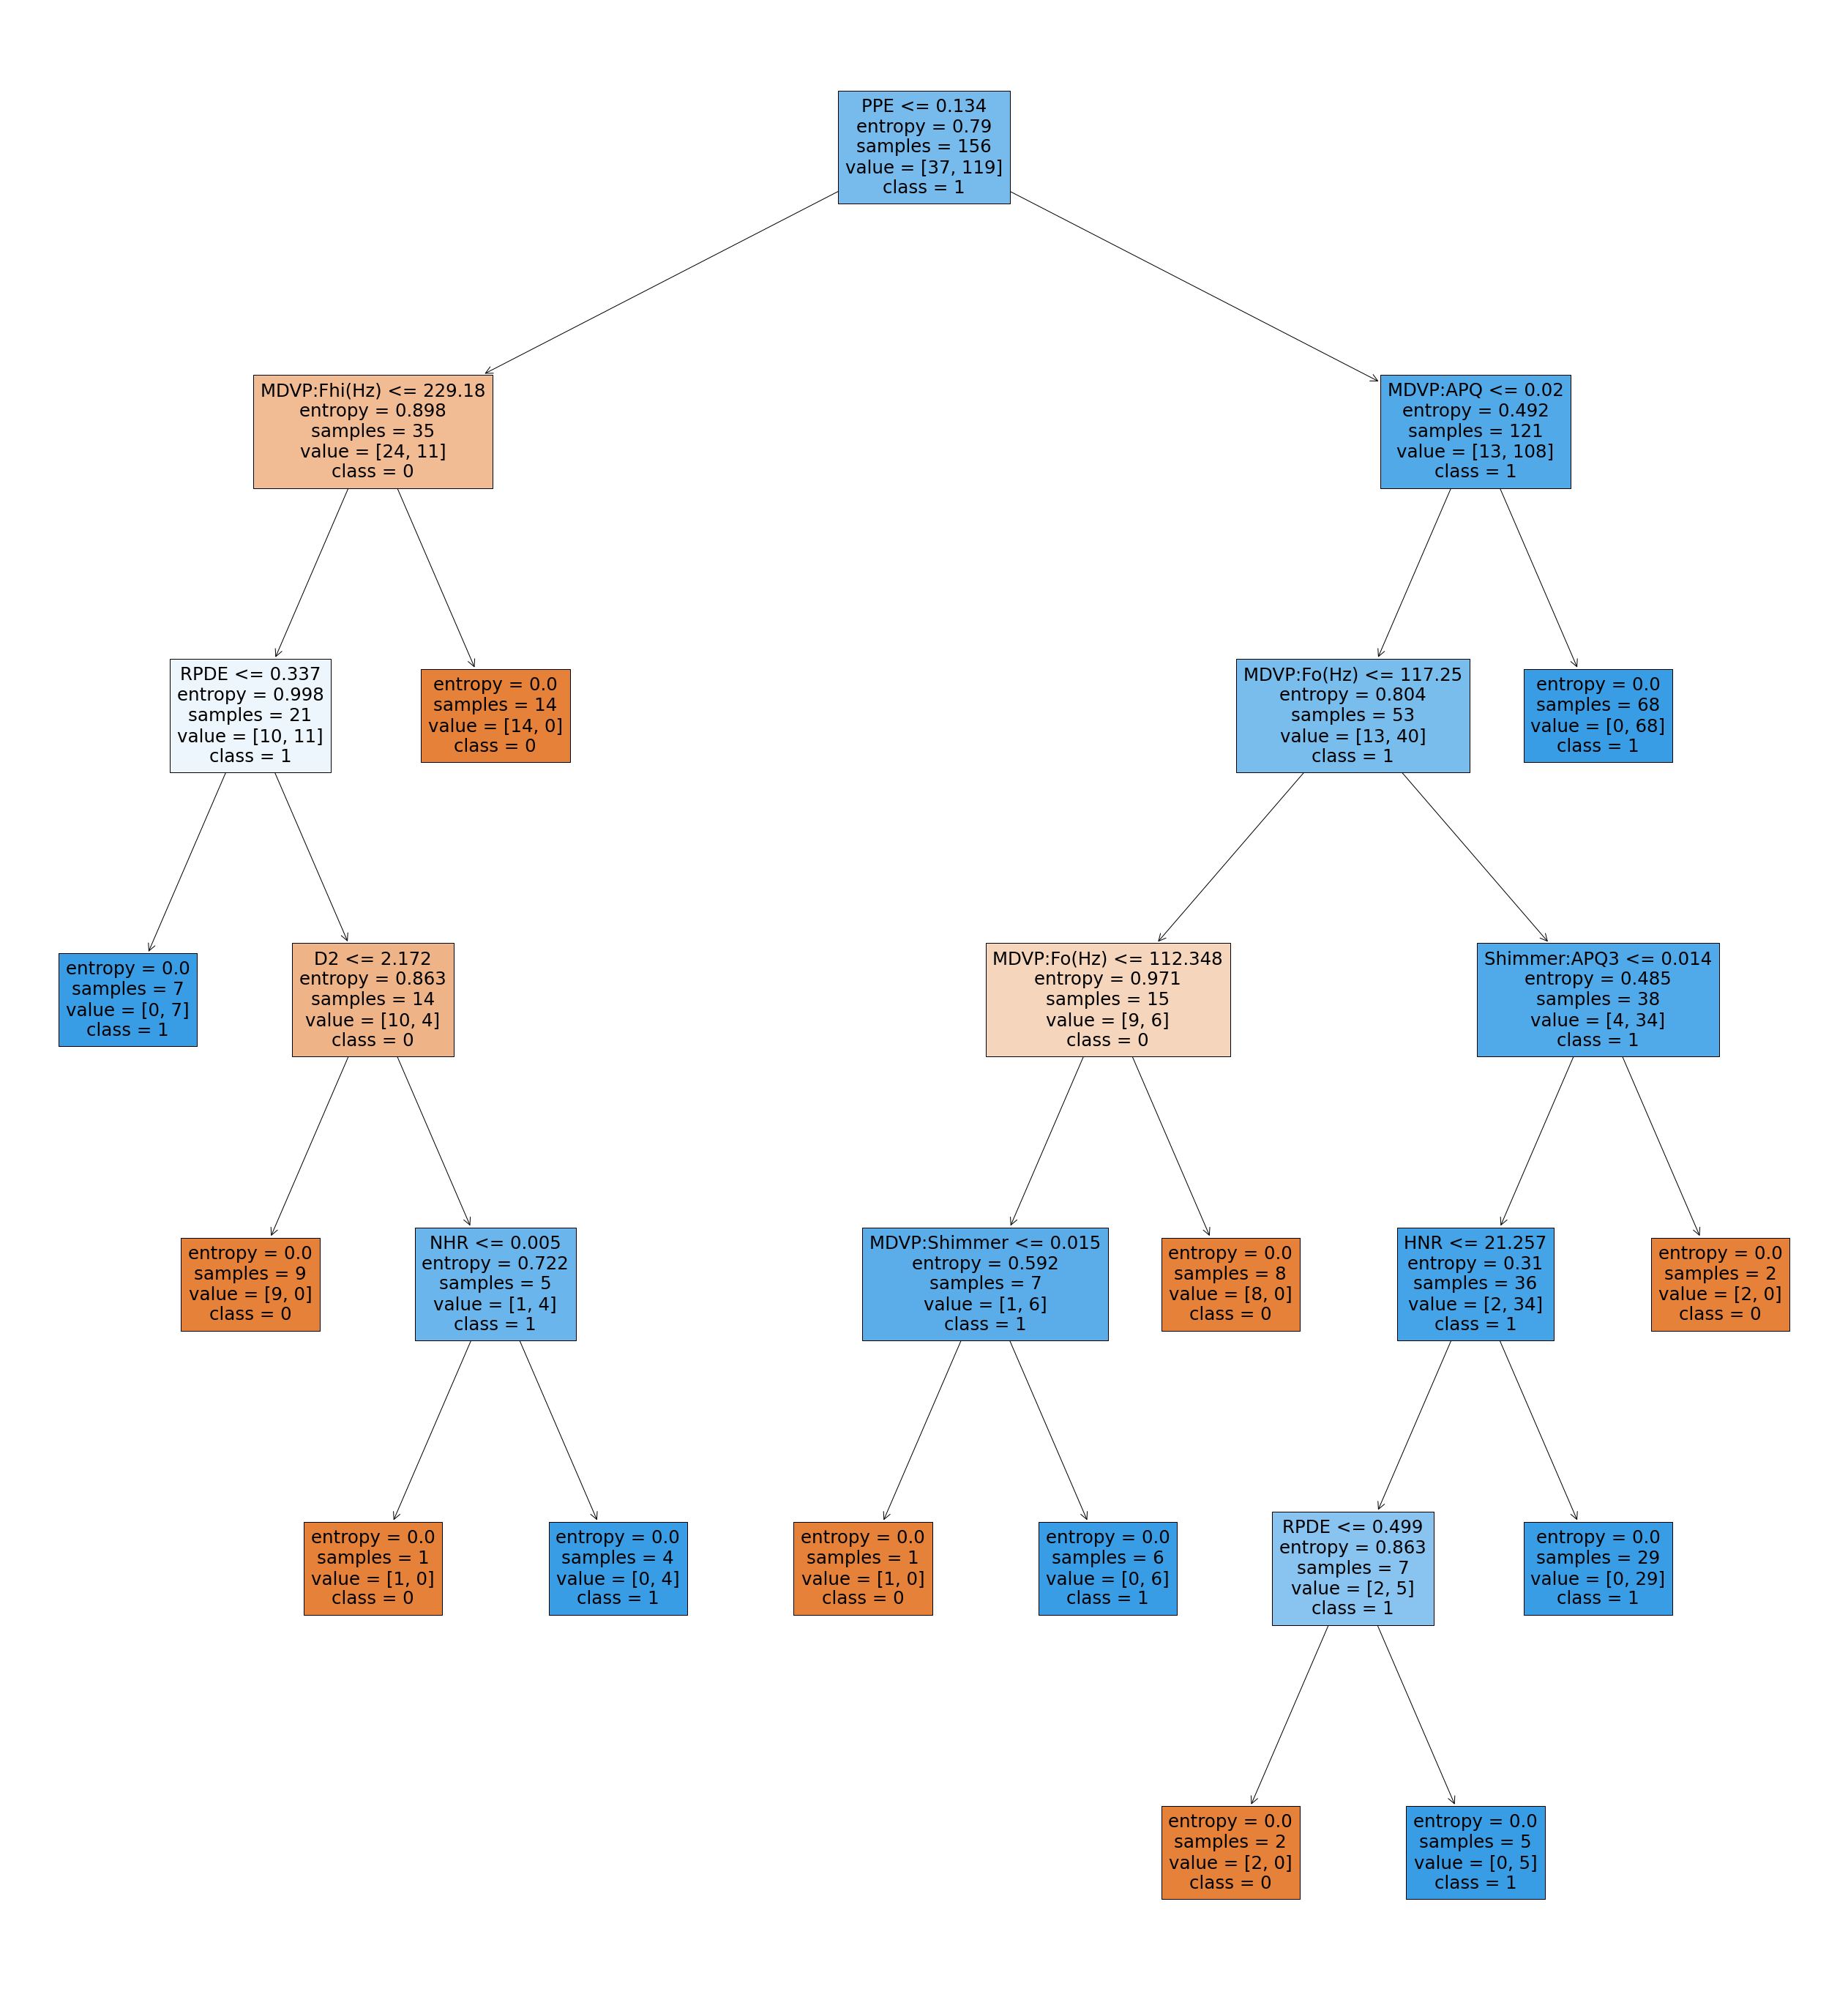

In [52]:
from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dtmodel,
                   feature_names=xtrain.columns,  
                   class_names=["0","1"],
                   filled=True)

In [74]:
from sklearn.metrics import classification_report

train_pred = dtmodel.predict(xtrain)
test_pred = dtmodel.predict(xtest)
print('Training Model\n',classification_report(ytrain,train_pred))
print('Test Model\n',classification_report(ytest,test_pred))

Training Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Test Model
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

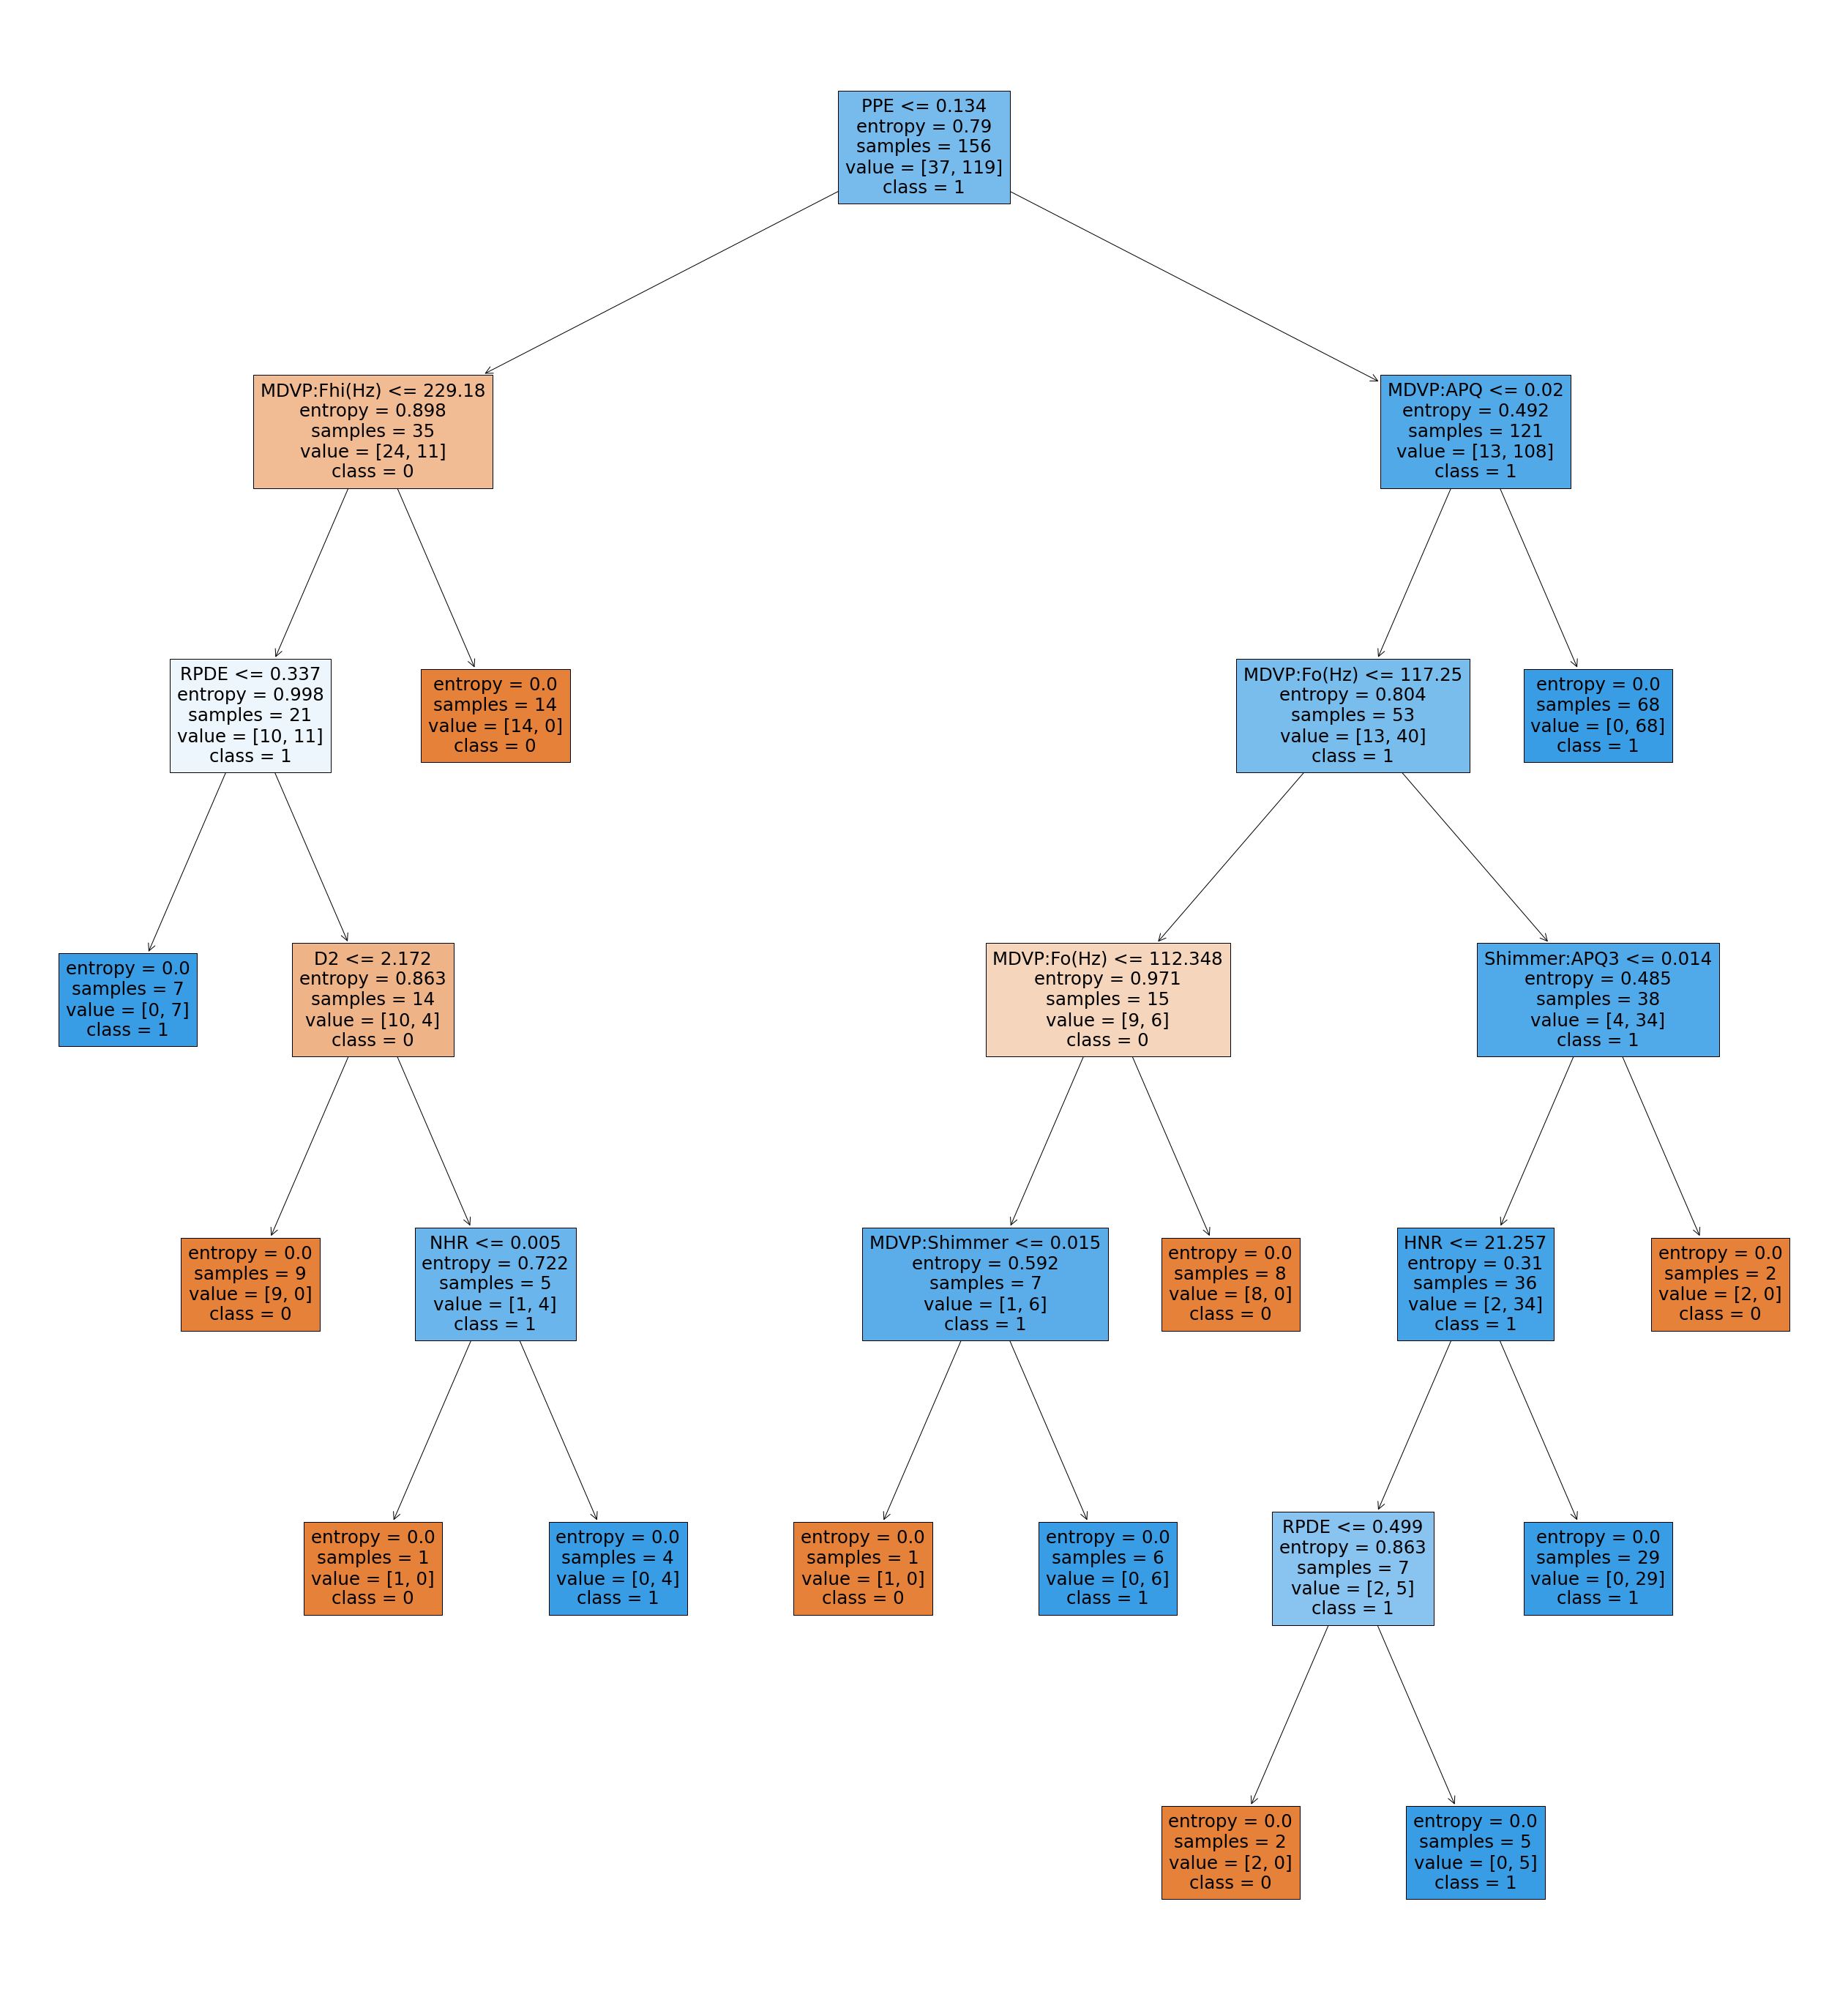

In [91]:
dt = DecisionTreeClassifier(criterion='entropy',
                            random_state=10,
                            max_depth=10,
                           min_samples_leaf=5)


model = dt.fit(xtrain,ytrain)

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dtmodel,
                   feature_names=xtrain.columns,  
                   class_names=["0","1"],
                   filled=True)

In [92]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)
print('Training Model\n',classification_report(ytrain,train_pred))
print('Test Model\n',classification_report(ytest,test_pred))

Training Model
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.97      0.97      0.97       119

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156

Test Model
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.96      0.96      0.96        28

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150,criterion='entropy')
modelRF = rfc.fit(xtrain,ytrain)

train_pred = modelRF.predict(xtrain)
test_pred = modelRF.predict(xtest)
print('Training Model\n',classification_report(ytrain,train_pred))
print('Test Model\n',classification_report(ytest,test_pred))

Training Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Test Model
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

